![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

# Новый раздел

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
dfs=df.copy()

In [ ]:
dfs.drop('location',axis=1,inplace=True)

In [ ]:
dfs.drop('district',axis=1,inplace=True)

In [ ]:
col=['xonalar_soni','uy_maydoni','uy_qavati','jami_qavat','narxi']
dfs.columns=col

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   xonalar_soni  7565 non-null   int64 
 1   uy_maydoni    7565 non-null   object
 2   uy_qavati     7565 non-null   int64 
 3   jami_qavat    7565 non-null   int64 
 4   narxi         7565 non-null   object
dtypes: int64(3), object(2)
memory usage: 295.6+ KB


In [ ]:
dfs.drop(dfs[dfs['narxi']=="Договорная"].index, inplace=True)

In [ ]:
dfs.drop(dfs[dfs['uy_maydoni']=="Площадьземли:1сот"].index, inplace=True)

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   xonalar_soni  7565 non-null   int64  
 1   uy_maydoni    7565 non-null   float64
 2   uy_qavati     7565 non-null   int64  
 3   jami_qavat    7565 non-null   int64  
 4   narxi         7565 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 612.6 KB


In [ ]:
dfs['narxi']=dfs['narxi'].replace({'Договорная':'46000'})

In [ ]:
dfs['uy_maydoni']=dfs['uy_maydoni'].replace({'Площадьземли:1сот':'69'})

In [ ]:
dfs['uy_maydoni']=dfs['uy_maydoni'].astype(float, errors='raise')

In [ ]:
dfs['narxi']=dfs['narxi'].replace({'Договорная':'46000'})

In [ ]:
dfs['narxi']=dfs['narxi'].astype(float, errors='raise')

NameError: ignored

In [ ]:
dfs.info()

NameError: ignored

In [ ]:
dfs[dfs['narxi']>1000000]

TypeError: ignored

In [ ]:
dfs['narxi'].ascending=False
dfs['narxi']

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: narxi, Length: 7565, dtype: float64

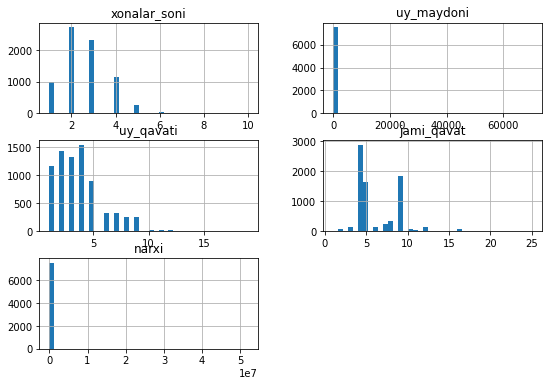

In [ ]:
%matplotlib inline 
dfs.hist(bins=40,figsize=(9,6))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dfs,test_size=0.2,random_state=40)
train_set

,xonalar_soni,uy_maydoni,uy_qavati,jami_qavat,narxi
3165,3,70.0,4,5,40000.0
1369,3,92.0,7,9,52500.0
3857,2,52.0,2,4,41500.0
3687,4,160.0,4,4,85000.0
4866,2,45.0,5,5,38000.0
...,...,...,...,...,...
3064,4,80.0,12,16,55000.0
6309,2,52.0,4,4,39000.0
6151,2,65.0,9,9,45000.0
6363,3,66.0,4,4,49000.0


In [ ]:
test_set

,xonalar_soni,uy_maydoni,uy_qavati,jami_qavat,narxi
4366,2,60.0,4,9,47000.0
6308,2,42.0,1,5,31000.0
6408,3,82.0,11,12,35000.0
2754,2,53.0,2,4,45500.0
2837,3,70.0,1,4,63000.0
...,...,...,...,...,...
5579,2,49.0,1,3,58500.0
5584,2,50.0,2,4,43000.0
4725,2,54.0,1,4,38500.0
7068,2,48.0,3,4,41000.0


In [ ]:
X_train =train_set.drop('narxi',axis=1)

In [ ]:
X_train.head()

,xonalar_soni,uy_maydoni,uy_qavati,jami_qavat
3165,3,70.0,4,5
1369,3,92.0,7,9
3857,2,52.0,2,4
3687,4,160.0,4,4
4866,2,45.0,5,5


In [ ]:
y=train_set['narxi'].copy()

Pipeline quramiz

Sonli ustunlar uchun

In [ ]:
from numpy.core.multiarray import min_scalar_type
from sklearn.preprocessing import MinMaxScaler
min_mix_scaler =MinMaxScaler()
min_mix_scaler.fit_transform(X_train)

array([[0.22222222, 0.00098573, 0.16666667, 0.16666667],
       [0.22222222, 0.00130002, 0.33333333, 0.33333333],
       [0.11111111, 0.00072858, 0.05555556, 0.125     ],
       ...,
       [0.11111111, 0.0009143 , 0.44444444, 0.33333333],
       [0.22222222, 0.00092858, 0.16666667, 0.125     ],
       [0.11111111, 0.00055715, 0.22222222, 0.16666667]])

In [ ]:
from sklearn.preprocessing import StandardScaler
standart_scaler=StandardScaler()
standart_scaler.fit_transform(X_train)

array([[ 0.3436192 , -0.02896697,  0.1250726 , -0.40531473],
       [ 0.3436192 , -0.01335489,  1.45381349,  1.12706994],
       [-0.57451916, -0.04174049, -0.76075465, -0.7884109 ],
       ...,
       [-0.57451916, -0.03251517,  2.33964074,  1.12706994],
       [ 0.3436192 , -0.03180553,  0.1250726 , -0.7884109 ],
       [-0.57451916, -0.05025617,  0.56798623, -0.40531473]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
num_pipeline=Pipeline([
                   ('mm_scaler',MinMaxScaler())    
])

In [ ]:
x_prepared=num_pipeline.fit_transform(X_train)
x_prepared

array([[0.22222222, 0.00098573, 0.16666667, 0.16666667],
       [0.22222222, 0.00130002, 0.33333333, 0.33333333],
       [0.11111111, 0.00072858, 0.05555556, 0.125     ],
       ...,
       [0.11111111, 0.0009143 , 0.44444444, 0.33333333],
       [0.22222222, 0.00092858, 0.16666667, 0.125     ],
       [0.11111111, 0.00055715, 0.22222222, 0.16666667]])

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_prepared,y)

LinearRegression()

In [ ]:
test_data =X_train.sample(10)
test_data

,xonalar_soni,uy_maydoni,uy_qavati,jami_qavat
3972,2,70.0,5,7
1341,2,41.0,4,4
3447,3,80.0,5,5
5912,3,78.0,2,5
178,2,60.0,5,9
6704,3,72.0,7,9
3006,3,67.0,4,4
6686,3,75.0,1,5
1008,3,67.0,3,5
5049,3,80.0,4,5


In [ ]:
test_label=y.loc[test_data.index]
test_label

3972    56000.0
1341    31000.0
3447    36000.0
5912    52500.0
178     34000.0
6704    35500.0
3006    46000.0
6686    60000.0
1008    63000.0
5049    56000.0
Name: narxi, dtype: float64

In [ ]:
test_data_prepared=num_pipeline.transform(test_data)
test_data_prepared

array([[0.11111111, 0.00098573, 0.22222222, 0.25      ],
       [0.11111111, 0.00057144, 0.16666667, 0.125     ],
       [0.22222222, 0.00112859, 0.22222222, 0.16666667],
       [0.22222222, 0.00110002, 0.05555556, 0.16666667],
       [0.11111111, 0.00084287, 0.22222222, 0.33333333],
       [0.22222222, 0.0010143 , 0.33333333, 0.33333333],
       [0.22222222, 0.00094287, 0.16666667, 0.125     ],
       [0.22222222, 0.00105716, 0.        , 0.16666667],
       [0.22222222, 0.00094287, 0.11111111, 0.16666667],
       [0.22222222, 0.00112859, 0.16666667, 0.16666667]])

In [ ]:
import pandas as pd

In [ ]:
predicted_data=LR_model.predict(test_data_prepared)
pd.DataFrame(predicted_data)


,0
0,47671.162973
1,45466.072772
2,77455.347800
3,92576.807523
4,52505.928236
5,77042.287672
6,80081.080191
7,97617.647927
8,87538.090096
9,82495.733280


In [ ]:
pd.DataFrame(y)

,narxi
3165,40000.0
1369,52500.0
3857,41500.0
3687,85000.0
4866,38000.0
...,...
3064,55000.0
6309,39000.0
6151,45000.0
6363,49000.0


In [ ]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
3972,47671.162973,56000.0
1341,45466.072772,31000.0
3447,77455.347800,36000.0
5912,92576.807523,52500.0
178,52505.928236,34000.0
6704,77042.287672,35500.0
3006,80081.080191,46000.0
6686,97617.647927,60000.0
1008,87538.090096,63000.0
5049,82495.733280,56000.0


In [ ]:
x_test = test_set.drop('narxi',axis=1)

In [ ]:
y_test=test_set['narxi'].copy()
y_test

4366    47000.0
6308    31000.0
6408    35000.0
2754    45500.0
2837    63000.0
         ...   
5579    58500.0
5584    43000.0
4725    38500.0
7068    41000.0
7149    44000.0
Name: narxi, Length: 1513, dtype: float64

In [ ]:
X_test_prepared = num_pipeline.transform(x_test)
X_test_prepared

array([[0.11111111, 0.00084287, 0.16666667, 0.33333333],
       [0.11111111, 0.00058572, 0.        , 0.16666667],
       [0.22222222, 0.00115716, 0.55555556, 0.45833333],
       ...,
       [0.11111111, 0.00075715, 0.        , 0.125     ],
       [0.11111111, 0.00067144, 0.11111111, 0.125     ],
       [0.22222222, 0.00098573, 0.16666667, 0.125     ]])

In [ ]:
y_predict=LR_model.predict(X_test_prepared)
y_predict

array([57546.31371644, 63003.70199645, 64129.10261637, ...,
       60585.25787602, 50505.39676315, 80080.62526696])

In [ ]:
from sklearn.metrics import median_absolute_error
mae=median_absolute_error(y_test,y_predict)
print("MAE",mae)

MAE 22161.3962272325


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)
print("RMSE",np.sqrt(mse))

RMSE 108329.26998254377


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>